In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import math
import os

import shapely.geometry as geo
import shapely.ops as ops
import shapely.wkt
import shapely.wkb
from shapely import affinity
import shapely

from collections.abc import Iterable


In [2]:
describe_percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0]
pd.set_option('display.max_columns', None)

In [3]:
def get_polygon_list(polygon):
    '''
    A convenience function to return a consistent
    iterator for a Polygon or MultiPolygon.
    '''
   
    
    if not isinstance(polygon, Iterable):
        plist = [ polygon ]
    elif 'GeometryCollection' in polygon.geom_type:
        plist = list(polygon)
    else:
        plist = polygon
        
    return plist


In [4]:
def plot_coverage(polydf, roi=None, roiname=None, title='ROI', savefile=None, dpi=300,
                  display=False, annotate=True, nlatoffsets=3, latoff=1.0,  **kwargs):
    """
    Plot coverage, corner and other data with save options of
    a mesh shape analysis.
    
    
    
    If a savfile is not provided snd display is False, then no
    action is taken and return is immediate.

    Parameters
    ----------
    polydf : dataframe
        This dataframe contains the 
        
    roi : polygon
        Polygon of the region of interest
        
    map : string, file name
        If provided, the result of the plot will be saved as a PNG
        image
        
    dpi : integer
        Number dots per inch of the plot
        
    display : boolean
        If True, will display the plot interactively
        
    annotate : boolean
        It true, write shape file names on plot
        
    latoff: float
        Latitude displacement for annotating file names
        
    kwargs : dict
        Option keyword arguments
        
    Returns
    -------
    None
    
    """
    
    # Check if we need to do anything
    if (savefile is None) and (display is False):
        return
    
    if len(polydf) > 0:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
        i_ax = plt.subplot(1,1,1)

        xpass = -1
        for index, row in polydf.iterrows():
            xpass += 1
            polygon = row.polygon
            fname = row['SourceProductId']

            for p in get_polygon_list(polygon):
                plt.plot(*p.exterior.xy)
                cx,cy = p.centroid.xy
                plt.scatter(cx,cy, marker='x', c='yellow')

            if annotate is True:
                x = row.CenterLongitude
                y = row.CenterLatitude + ((xpass & nlatoffsets) * latoff)
                i_ax.annotate(fname, xy=(x,y), xycoords='data', xytext=(x,y), textcoords='data', ha='center')

        if roi is not None:

            for p in get_polygon_list(roi):
                plt.plot(*p.exterior.xy, color='red', marker='.' )
                
            if (annotate is True) and (roiname is not None):
                x = roi.centroid.x
                y = roi.centroid.y
                i_ax.annotate(roiname, xy=(x,y), xycoords='data', xytext=(x,y), color='red',textcoords='data', ha='center')                


        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(title)

        if savefile is not None:
            plt.savefig(savefile,dpi=(dpi))
        if display is True:    
            plt.show()
            
        plt.close(fig)
            
    return
        



In [5]:
base='osinac'
rootdir = '/Users/zouxd/19PDART/from_K/no-itar_comet/Comets/Rosetta/OSIRIS'
dbfile = os.path.join(rootdir, '01_rosetta_database.csv')
database  = pd.read_csv(dbfile,na_values="NULL")

In [6]:
database['polygon'] = database.apply(lambda row: shapely.wkb.loads(row.GisFootprint, hex=True), axis=1)

In [7]:
database.describe(describe_percentiles)

,Lines,Samples,FilterNumber,FilterOneCenter,FilterTwoCenter,Data_Quality_Id,Detector_Temperature,ObservationTime,ExposureDuration,CenterLongitude,CenterLatitude,CenterRadius,LocalRadiusMinimum,LocalRadiusMaximum,LocalRadiusAverage,MeanValue,MinimumValue,MaximumValue,StandardDeviation,PixelResolution,MeanGroundResolution,ObliqueResolutionMinimum,ObliqueResolutionMaximum,ObliqueResolutionAverage,ObliqueResolutionStandardDeviation,MinimumLatitude,MaximumLatitude,MinimumLongitude,MaximumLongitude,MinimumResolution,MaximumResolution,ResolutionAverage,MinimumPhase,MaximumPhase,PhaseAverage,MinimumEmission,MaximumEmission,EmissionAverage,MinimumIncidence,MaximumIncidence,IncidenceAverage,OffNadir,SolarLongitude,NorthAzimuth,RightAscension,Declination,LocalTime,LocalSolarTimeAverage,CentroidLine,CentroidSample,CentroidLatitude,CentroidLongitude,CentroidRadius,SurfaceArea,GlobalCoverage,IncidenceAngle,EmissionAngle,PhaseAngle,SubSolarGroundAzimuth,SubSpacecraftGroundAzimuth,SubSpacecraftLongitude,SubSpacecraftLatitude,SubSolarAzimuth,SubSolarLongitude,SubSolarLatitude,TargetCenterDistance,SlantDistance,ParallaxX,ParallaxY,ShadowX,ShadowY
count,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,2.516200e+04,25162.000000,18247.000000,18247.000000,18247.000000,25162.000000,25162.000000,25162.000000,2.516200e+04,2.516200e+04,25162.000000,2.516200e+04,18247.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,2.516200e+04,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,18247.000000,18247.000000,17919.000000,18247.000000,18247.000000,18247.000000,25162.000000,20289.000000,20289.000000,25162.000000,25162.000000,20289.000000,25162.000000,25162.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,17930.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,2020.489309,2020.489309,28.654837,657.843538,592.170873,2.557030,149.251699,4.953123e+08,1.903381,187.032498,-7.413234,1703.806680,1074.052266,2397.722660,1786.380508,2.103712e-03,-6.029439e-05,0.022970,1.819568e-03,2.375674,3.556141,3.589025,149.467156,6.110517,4.992121,-49.433440,45.633329,5.569104e+01,305.362546,3.532211,3.576155,3.547139,76.528869,78.000161,77.240477,12.817605,108.877861,50.101830,20.675042,119.902911,70.152197,1.095991,167.224677,188.270070,180.481294,2.750451,11.578477,11.565389,1168.720282,997.722983,-1.977348,184.507763,1636.801166,14.851767,63.928406,57.538876,42.491108,78.712855,169.324394,185.593721,182.331176,-3.184724,255.611683,180.255101,-1.419153,126.552972,125.364494,0.194457,0.452111,-1.203934,0.883096
std,193.596560,193.596560,14.051642,118.703808,99.096164,50.370781,0.234487,1.835514e+07,16.483764,107.968572,33.767850,448.164505,518.706320,328.860229,286.633614,4.840429e-03,1.453216e-04,0.027200,1.759692e-03,2.919858,8.108357,9.867382,245.011044,14.330841,11.389495,38.098485,31.527384,9.099369e+01,89.844294,8.104985,8.109718,8.106888,20.029442,20.074115,20.040683,18.553807,33.444433,16.076469,24.650889,43.419316,22.220184,15.397431,115.550207,100.221045,107.182888,46.371083,4.159394,3.204747,556.290052,383.341397,28.415665,91.779554,473.474383,13.026325,81.446137,22.668708,24.749395,19.960774,106.499657,109.279848,105.976426,42.177618,49.515149,105.317835,31.264258,154.006613,154.081112,58.719030,42.654641,109.706598,146.051406
min,512.000000,512.000000,15.000000,600.000000,269.300000,0.000000,148.800000,4.584913e+08,0.072000,0.011742,-87.499630,470.332844,469.054197,619.393050,515.695803,-3.196297e-07,-2.522031e-03,0.000022,3.804234e-07,0.029865,0.029307,0.029858,0.038541,0.033900,0.000720,-89.996408,-60.808746,2.904818e-08,6.553296,0.028603,0.030017,0.029671,0.001290,1.351519,1.214089,0.001074,5.195435,2.340679,0.000730,8.411047,4.326628,-36.065698

In [8]:
database

,From,SourceProductId,SerialNumber,TargetName,RunDate,Lines,Samples,InstrumentId,FilterNumber,CombinedFilterName,FilterOneName,FilterTwoName,FilterOneCenter,FilterTwoCenter,DataSetId,Volume_Id,Data_Quality_Id,Mission_Phase_Name,Rosetta:Activity_Name,Detector_Temperature,StartTime,EndTime,ObservationTime,ExposureDuration,CenterLongitude,CenterLatitude,CenterRadius,LocalRadiusMinimum,LocalRadiusMaximum,LocalRadiusAverage,MeanValue,MinimumValue,MaximumValue,StandardDeviation,PixelResolution,MeanGroundResolution,ObliqueResolutionMinimum,ObliqueResolutionMaximum,ObliqueResolutionAverage,ObliqueResolutionStandardDeviation,MinimumLatitude,MaximumLatitude,MinimumLongitude,MaximumLongitude,MinimumResolution,MaximumResolution,ResolutionAverage,MinimumPhase,MaximumPhase,PhaseAverage,MinimumEmission,MaximumEmission,EmissionAverage,MinimumIncidence,MaximumIncidence,IncidenceAverage,HasNorthPole,HasSouthPole,HasLongitudeBoundary,OffNadir,SolarLongitude,NorthAzimuth,RightAscension,Declination,LocalTime,LocalSolarTimeAverage,CentroidLine,CentroidSample,CentroidLatitude,CentroidLongitude,CentroidRadius,SurfaceArea,GlobalCoverage,IncidenceAngle,EmissionAngle,PhaseAngle,SubSolarGroundAzimuth,SubSpacecraftGroundAzimuth,SubSpacecraftLongitude,SubSpacecraftLatitude,SubSolarAzimuth,SubSolarLongitude,SubSolarLatitude,TargetCenterDistance,SlantDistance,ParallaxX,ParallaxY,ShadowX,ShadowY,GisFootprint,polygon
0,n20160113t115451924id4ff61.cub,n20160113t115451924id4ff61,Rosetta/OSINAC/1/0411306891.60560,67P/CHURYUMOV-GERASIMENKO,2020-11-10T03:37:36,512,512,OSINAC,61,Fe2O3_FFP-IR,Fe2O3,FFP-IR,931.9,600.0,RO-C-OSINAC-4-EXT1-67P-M25-INF-REFL-V1.0,ROOSI_4545,0,ROSETTA EXTENSION 1,STP091_GAS_MON_001,149.25,2016-01-13 11:56:14.696997600,2016-01-13 11:56:14.696997600,5.059582e+08,1.058,176.836035,25.161322,2189.793024,1867.132373,2618.731398,2236.639488,0.000456,0.000000,0.006115,0.001207,1.630573,1.638121,1.618093,43.826796,3.676598,2.639605,-10.150067,43.950759,154.386276,201.227931,1.615708,1.660117,1.632292,87.032652,87.593795,87.294220,21.838116,127.777936,51.433065,24.881078,88.934423,71.285777,False,False,False,-25.428489,342.746956,136.440628,145.978629,-71.251753,13.308843,13.358628,193.203277,173.139065,17.852661,184.129195,2236.220353,1.229245,1.956138,76.280097,39.673535,87.314073,208.529784,321.525532,94.818275,55.259372,338.768016,157.203398,-13.517737,86.944429,86.045446,-0.649353,-0.516047,3.598602,-1.956304,010300000001000000480000000D4136EDA0ED6940F637...,"POLYGON ((207.4258943614626 12.10497989810754,..."
1,n20160113t115508698id4ff41.cub,n20160113t115508698id4ff41,Rosetta/OSINAC/1/0411306908.45792,67P/CHURYUMOV-GERASIMENKO,2020-11-10T03:37:36,512,512,OSINAC,41,Near-IR_FFP-IR,Near-IR,FFP-IR,882.1,600.0,RO-C-OSINAC-4-EXT1-67P-M25-INF-REFL-V1.0,ROOSI_4545,0,ROSETTA EXTENSION 1,STP091_GAS_MON_001,149.23,2016-01-13 11:56:31.154161300,2016-01-13 11:56:31.154161300,5.059583e+08,0.423,176.778323,25.071775,2187.911705,1865.287975,2623.020389,2235.830623,0.000369,0.000000,0.005058,0.000979,1.630645,1.638184,1.621419,57.420428,3.739582,3.071618,-10.569755,43.952618,154.256637,201.132541,1.615673,1.660404,1.632351,87.030978,87.592121,87.292242,21.824543,128.545794,51.604948,25.008363,88.930745,71.195449,False,False,False,-25.494330,342.747016,130.544509,145.986110,-71.250653,13.314084,13.363098,194.073302,173.481492,17.840459,184.018963,2234.492286,1.230787,1.961622,76.180301,39.719527,87.312399,208.675656,321.559496,94.686233,55.260318,336.875029,157.067062,-13.517691,86.943548,86.049234,-0.650721,-0.516505,3.566636,-1.950707,0103000000010000004800000004F49B56AFEA6940996E...,"POLYGON ((207.3339036031686 12.09052433241532,..."
2,n20160113t115435330id4ff27.cub,n20160113t115435330id4ff27,Rosetta/OSINAC/1/0411306875.21648,67P/CHURYUMOV-GERASIMENKO,2020-11-10T03:37:36,512,512,OSINAC,27,FFP-Vis_Hydra,FFP-Vis,Hydra,600.0,701.2,RO-C-OSINAC-4-EXT1-67P-M25-INF-REFL-V1.0,ROOSI_4545,0,ROSETTA EXTENSION 1,STP091_GAS_MON_001,149.22,2016-01-13 11:55:57.785742200,2016-

In [9]:
print("Average Resolution:        {}".format(np.mean(database['ResolutionAverage'])))
print("Average ObliqueResolution: {}".format(np.mean(database['ObliqueResolutionAverage'])))


Average Resolution:        3.547139272998655
Average ObliqueResolution: 6.110516912547918


In [10]:
database.sort_values(by='PixelResolution', ascending=False)

,From,SourceProductId,SerialNumber,TargetName,RunDate,Lines,Samples,InstrumentId,FilterNumber,CombinedFilterName,FilterOneName,FilterTwoName,FilterOneCenter,FilterTwoCenter,DataSetId,Volume_Id,Data_Quality_Id,Mission_Phase_Name,Rosetta:Activity_Name,Detector_Temperature,StartTime,EndTime,ObservationTime,ExposureDuration,CenterLongitude,CenterLatitude,CenterRadius,LocalRadiusMinimum,LocalRadiusMaximum,LocalRadiusAverage,MeanValue,MinimumValue,MaximumValue,StandardDeviation,PixelResolution,MeanGroundResolution,ObliqueResolutionMinimum,ObliqueResolutionMaximum,ObliqueResolutionAverage,ObliqueResolutionStandardDeviation,MinimumLatitude,MaximumLatitude,MinimumLongitude,MaximumLongitude,MinimumResolution,MaximumResolution,ResolutionAverage,MinimumPhase,MaximumPhase,PhaseAverage,MinimumEmission,MaximumEmission,EmissionAverage,MinimumIncidence,MaximumIncidence,IncidenceAverage,HasNorthPole,HasSouthPole,HasLongitudeBoundary,OffNadir,SolarLongitude,NorthAzimuth,RightAscension,Declination,LocalTime,LocalSolarTimeAverage,CentroidLine,CentroidSample,CentroidLatitude,CentroidLongitude,CentroidRadius,SurfaceArea,GlobalCoverage,IncidenceAngle,EmissionAngle,PhaseAngle,SubSolarGroundAzimuth,SubSpacecraftGroundAzimuth,SubSpacecraftLongitude,SubSpacecraftLatitude,SubSolarAzimuth,SubSolarLongitude,SubSolarLatitude,TargetCenterDistance,SlantDistance,ParallaxX,ParallaxY,ShadowX,ShadowY,GisFootprint,polygon
5235,n20150930t093636740id4ff22.cub,n20150930t093636740id4ff22,Rosetta/OSINAC/1/0402226596.48544,67P/CHURYUMOV-GERASIMENKO,2020-11-10T11:32:33,2048,2048,OSINAC,22,FFP-Vis_Orange,FFP-Vis,Orange,600.0,649.2,RO-C-OSINAC-4-ESC3-67P-M21-INF-REFL-V1.0,ROOSI_4465,0,COMET ESCORT 3,STP076_ACTIVITY_MONITOR_076,149.60,2015-09-30 09:37:56.067543300,2015-09-30 09:37:56.067543300,4.968779e+08,0.080,138.342812,-50.436944,1404.301495,980.572831,2572.130897,1750.104490,0.000037,-0.000026,0.017151,0.000389,27.820870,27.844024,27.857920,297.329422,45.304023,27.149000,-88.631272,31.133788,0.810041,359.373720,27.811237,27.864425,27.832134,50.146268,50.277230,50.206854,6.068865,127.352401,54.863345,7.592460,162.021643,63.483492,False,True,True,2.732594,290.836742,124.001890,45.743439,37.960812,3.452982,9.857973,1017.694676,994.938120,-33.618200,175.780014,1552.193761,34.495866,113.937142,60.452244,25.881162,50.186659,146.265096,130.076692,175.948036,-60.465372,268.094255,266.548086,-47.697084,1469.400522,1468.109387,0.312357,0.371242,1.467022,0.979674,0103000000010000001500000024C7FC5EAF6B6840F3C6...,"POLYGON ((195.3651575982159 6.321942455879014,..."
5322,n20150930t144300779id4ff22.cub,n20150930t144300779id4ff22,Rosetta/OSINAC/1/0402244980.51056,67P/CHURYUMOV-GERASIMENKO,2020-11-10T11:46:21,2048,2048,OSINAC,22,FFP-Vis_Orange,FFP-Vis,Orange,600.0,649.2,RO-C-OSINAC-4-ESC3-67P-M21-INF-REFL-V1.0,ROOSI_4465,0,COMET ESCORT 3,STP076_ACTIVITY_MONITOR_076,149.30,2015-09-30 14:44:20.111925200,2015-09-30 14:44:20.111925200,4.968963e+08,0.080,339.126878,-40.820411,1007.023128,939.237797,2534.857043,1750.438880,0.000038,-0.000017,0.019329,0.000435,27.283851,27.299824,27.319107,189.996127,49.645440,30.766901,-86.945031,25.109329,0.680301,358.421756,27.269629,27.320285,27.282448,50.233839,50.375743,50.311337,4.352935,132.618997,43.377526,15.283016,153.360928,58.440443,False,True,True,-5.639308,290.994951,92.747990,45.858681,37.551124,2.896502,8.956438,958.994974,1059.993372,-33.222300,182.764631,1682.119493,34.538975,97.137269,61.407497,28.494652,50.296067,152.198466,140.134669,25.332348,-60.113337,260.436936,115.679355,-47.630719,1440.604288,1439.770858,0.416655,0.347949,1.622919,0.855723,01030000000100000016000000843F95BE63AE43403940...,"POLYGON ((39.36241895949846 9.405918653850778,..."
5399,n20150930t194926772id4ff22.cub,n20150930t194926772id4ff22,Rosetta/OSINAC/1/0402263366.50608,67P/CHURYUMOV-GERASIMENKO,2020-11-10T11:59:52,2048,2048,OSINAC,22,FFP-Vis_Orange,FFP-Vis,Orange,600.0,649.2,RO-C-OSINAC-4-ESC3-67P-M21-INF-REFL-V1.0,ROOSI_4465,0,COMET ESCORT 3,STP076_ACTIVITY_MONITOR_

In [11]:
highres = database[database['PixelResolution'] <= 1]

In [12]:
highres.describe()

,Lines,Samples,FilterNumber,FilterOneCenter,FilterTwoCenter,Data_Quality_Id,Detector_Temperature,ObservationTime,ExposureDuration,CenterLongitude,CenterLatitude,CenterRadius,LocalRadiusMinimum,LocalRadiusMaximum,LocalRadiusAverage,MeanValue,MinimumValue,MaximumValue,StandardDeviation,PixelResolution,MeanGroundResolution,ObliqueResolutionMinimum,ObliqueResolutionMaximum,ObliqueResolutionAverage,ObliqueResolutionStandardDeviation,MinimumLatitude,MaximumLatitude,MinimumLongitude,MaximumLongitude,MinimumResolution,MaximumResolution,ResolutionAverage,MinimumPhase,MaximumPhase,PhaseAverage,MinimumEmission,MaximumEmission,EmissionAverage,MinimumIncidence,MaximumIncidence,IncidenceAverage,OffNadir,SolarLongitude,NorthAzimuth,RightAscension,Declination,LocalTime,LocalSolarTimeAverage,CentroidLine,CentroidSample,CentroidLatitude,CentroidLongitude,CentroidRadius,SurfaceArea,GlobalCoverage,IncidenceAngle,EmissionAngle,PhaseAngle,SubSolarGroundAzimuth,SubSpacecraftGroundAzimuth,SubSpacecraftLongitude,SubSpacecraftLatitude,SubSolarAzimuth,SubSolarLongitude,SubSolarLatitude,TargetCenterDistance,SlantDistance,ParallaxX,ParallaxY,ShadowX,ShadowY
count,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9.472000e+03,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9.472000e+03,9472.000000,9472.000000,9.472000e+03,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9.472000e+03,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9304.000000,9472.000000,9472.000000,9472.000000,9472.000000,7811.000000,7811.000000,9472.000000,9472.000000,7811.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9305.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000
mean,2022.486486,2022.486486,29.177998,657.878938,584.777101,3.818623,149.272480,4.987975e+08,1.131006,187.743671,4.275039,1791.839792,1393.591081,2132.997201,1797.638825,4.366400e-03,-0.000127,0.034996,2.662203e-03,0.388362,0.393361,0.382830,42.633434,0.621197,0.488994,-17.336381,27.726289,1.148658e+02,247.881708,0.380867,0.405683,0.389033,78.075014,80.279478,79.158906,21.061848,80.713817,43.061394,37.596069,82.214735,60.519960,2.098335,90.960016,226.231582,170.780649,2.877930,11.508142,11.552811,1037.012084,1000.753152,4.973290,188.665364,1743.993226,2.409753,14.223602,59.213229,40.951131,79.187974,159.136765,186.894296,182.040765,-2.225448,254.639453,174.673909,20.833668,21.768957,20.493866,-0.002288,0.390523,-2.119238,0.667854
std,182.436161,182.436161,14.762284,115.891709,95.014968,61.535949,0.297179,2.560948e+07,2.788311,109.063924,28.234230,464.991618,555.379729,346.964133,410.415485,6.988639e-03,0.000205,0.036923,1.845684e-03,0.233649,0.237062,0.230295,107.911431,0.386250,0.660619,31.034943,31.371347,1.065114e+02,104.316919,0.230729,0.243394,0.234108,21.993329,21.957305,21.972261,18.508590,34.936171,18.961376,26.904163,24.053381,21.511027,15.738547,98.296294,86.957034,100.788521,44.604372,3.881189,3.617479,626.747508,444.511502,29.686614,107.018911,509.925307,2.895156,33.968326,23.710108,23.208997,21.983590,123.812536,98.528362,105.717977,41.555070,50.816012,104.710674,15.330910,12.298672,12.329684,13.655238,32.349445,81.988403,138.904343
min,512.000000,512.000000,15.000000,600.000000,269.300000,0.000000,148.890000,4.622373e+08,0.072000,0.011742,-87.499630,481.127478,469.055905,619.393050,515.695803,2.736960e-07,-0.002093,0.000104,3.804234e-07,0.029865,0.029307,0.029858,0.038541,0.033900,0.000720,-89.989916,-60.808746,2.904818e-08,6.553296,0.028603,0.030017,0.029671,0.001290,2.371296,1.214089,0.001074,5.195435,2.340679,0.000730,13.396862,5.735644,-34.501975,0.129042,0.005338,0.147959,-89.544444,0.042719,0.805646,-6522.076605,-6638.598985,-83.508017,

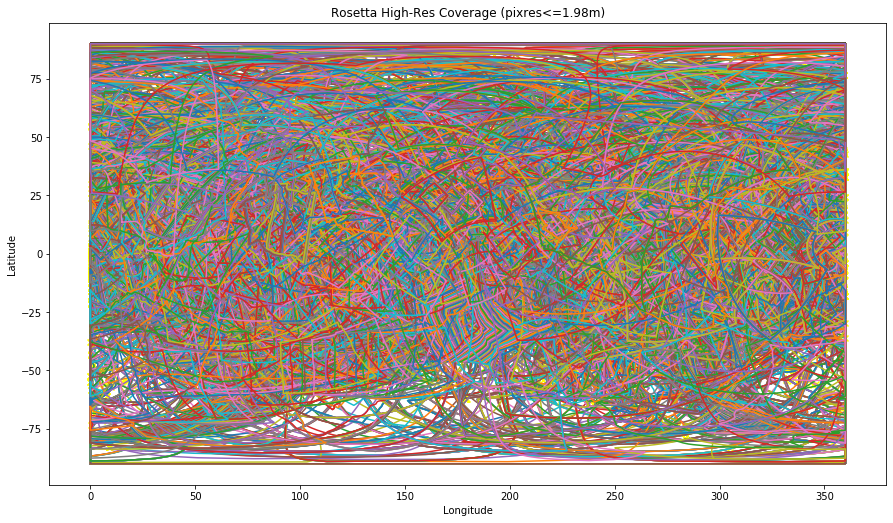

In [50]:
highfov = os.path.join(rootdir, 'rosetta_highres_fov.png')

plot_coverage(highres, title='Rosetta High-Res Coverage (pixres<=1.98m)', annotate=False, display=True, savefile=highfov)



In [13]:
highout = os.path.join(rootdir, 'rosetta_highres.csv')
highres.to_csv(highout, columns=['From'], header=False, index=False)

In [14]:
instruments = database.groupby(['InstrumentId'])
print("#Instruments: ", len(instruments))

#Instruments:  1


In [15]:
#sqare area
minx = 200-1 #lon
maxx = 200+1
miny = -30+1 #lat
maxy = -30-1
sambox = geo.box(minx, miny, maxx, maxy)

#poly area
sampoly = [(1,1),(2,1),(2,2),(1,2)]
sampoly = geo.Polygon(sampoly)

#circle roi
cp = geo.Point(35, 210)
circle_radius = 20 #degree
circleRoi = cp.buffer(circle_radius)
#
sammap = database.apply(lambda row: row.polygon.intersects(sambox), axis=1)
mapsams = database.query('@sammap')

In [16]:
mapsams.describe()

,Lines,Samples,FilterNumber,FilterOneCenter,FilterTwoCenter,Data_Quality_Id,Detector_Temperature,ObservationTime,ExposureDuration,CenterLongitude,CenterLatitude,CenterRadius,LocalRadiusMinimum,LocalRadiusMaximum,LocalRadiusAverage,MeanValue,MinimumValue,MaximumValue,StandardDeviation,PixelResolution,MeanGroundResolution,ObliqueResolutionMinimum,ObliqueResolutionMaximum,ObliqueResolutionAverage,ObliqueResolutionStandardDeviation,MinimumLatitude,MaximumLatitude,MinimumLongitude,MaximumLongitude,MinimumResolution,MaximumResolution,ResolutionAverage,MinimumPhase,MaximumPhase,PhaseAverage,MinimumEmission,MaximumEmission,EmissionAverage,MinimumIncidence,MaximumIncidence,IncidenceAverage,OffNadir,SolarLongitude,NorthAzimuth,RightAscension,Declination,LocalTime,LocalSolarTimeAverage,CentroidLine,CentroidSample,CentroidLatitude,CentroidLongitude,CentroidRadius,SurfaceArea,GlobalCoverage,IncidenceAngle,EmissionAngle,PhaseAngle,SubSolarGroundAzimuth,SubSpacecraftGroundAzimuth,SubSpacecraftLongitude,SubSpacecraftLatitude,SubSolarAzimuth,SubSolarLongitude,SubSolarLatitude,TargetCenterDistance,SlantDistance,ParallaxX,ParallaxY,ShadowX,ShadowY
count,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6.750000e+03,6750.000000,4489.000000,4489.000000,4489.000000,6750.000000,6750.000000,6750.000000,6.750000e+03,6750.000000,6750.000000,6750.000000,4489.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,4489.000000,4489.000000,4440.000000,4489.000000,4489.000000,4489.000000,6750.000000,5894.000000,5894.000000,6750.000000,6750.000000,5894.000000,6750.000000,6750.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4456.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000
mean,2045.876148,2045.876148,28.093630,658.107111,598.596341,0.010370,149.211539,4.948527e+08,1.564638,192.218800,-39.653700,1559.614702,949.592276,2595.214417,1767.171729,5.215120e-04,-0.000018,0.016189,0.001110,4.959675,6.644127,6.623463,238.371031,11.413922,9.395055,-84.685672,46.367990,16.345894,347.983127,6.612130,6.669201,6.630971,72.504183,73.472521,72.974632,3.459536,127.668067,52.123884,7.854948,153.139133,73.693796,-0.995899,253.244573,171.209989,175.373253,37.868248,11.332969,11.064573,1167.311897,974.650710,-27.013312,192.324304,1568.494675,27.868275,105.173274,55.142061,41.706637,76.857008,177.838246,164.268878,187.561375,-36.561913,255.915846,198.294659,-27.253663,262.805403,261.722417,-0.102214,-0.370549,0.074281,0.558614
std,51.349177,51.349177,13.182607,120.279825,98.733387,0.321887,0.090003,8.838813e+06,4.796876,88.002662,22.357133,308.593141,267.160601,110.805488,85.414486,9.866565e-04,0.000055,0.017291,0.001087,3.364380,5.790676,5.806740,275.685355,9.972978,10.249398,10.127877,22.429909,46.397531,34.566266,5.790135,5.789612,5.790624,14.757221,15.009879,14.872036,8.236002,19.038156,9.772208,13.312426,27.917672,13.184174,14.337086,72.191089,106.831345,115.643708,30.794379,4.965129,2.850846,333.952608,227.334478,14.579452,41.557133,309.935877,8.915300,65.858064,18.675298,22.445389,13.930168,96.872115,88.107617,89.654870,24.164791,41.646496,98.852479,24.553905,177.509610,177.538576,32.136075,18.418851,16.978865,17.550959
min,512.000000,512.000000,15.000000,600.000000,269.300000,0.000000,148.800000,4.602974e+08,0.080000,0.049940,-84.314924,549.675536,469.064291,1908.130887,1505.287363,-3.196297e-07,-0.000924,0.000349,0.000002,0.109160,0.107965,0.108098,2.145021,0.171540,0.057369,-89.975528,-27.787902,0.000004,198.072067,0.104870,0.111064,0.108762,27.863828,28.409142,28.110378,0.001105,27.994451,13.648063,0.010535,59.111238,27.536401,-35.415048,0.317515,0.029666,7.431784,-47.899510,0.050766,5.147734,92.933369,15.116098,-52.489756,65.262418,590.8

In [17]:
#plot_coverage(kh, roi=sambox, title='Kh area', annotate=False, display=True)#, savefile=highfov)


In [18]:
#database['HasNGPoint'] = database.apply(lambda row: row.polygon.contains(cp), axis=1)
highres['HasNGRegion'] = highres.apply(lambda row: row.polygon.intersects(sambox), axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
all_cov = "all-coverage.png"
pngname = os.path.join("/Users/zouxd/19PDART/AGU2021-analysis/", all_cov)
ks = highres[highres['HasNGRegion']==1]

print(len(ks))

323


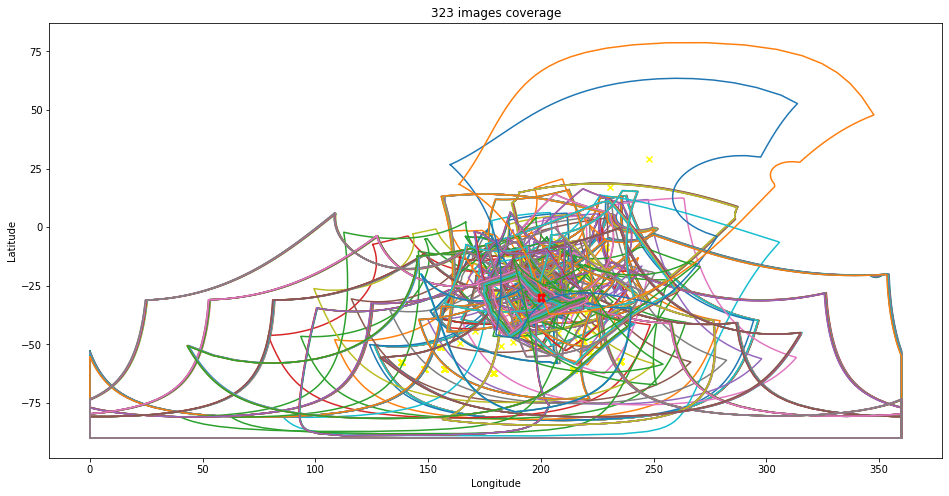

In [20]:
plot_coverage(ks, title = '{} images coverage'.format(len(ks)), 
              roi=sambox, annotate=False, display=True,
             roiname = 'ks', savefile = pngname, color =None)


In [40]:
ksnames = ks['From']

In [41]:
ksnames.to_csv('/Users/zouxd/19PDART/AGU2021-analysis/out.csv')

In [42]:
print(ksnames)


674      n20160207t010644507id4ff22.cub
675      n20160207t010650792id4ff22.cub
676      n20160207t010657089id4ff22.cub
677      n20160207t010703385id4ff22.cub
678      n20160207t010709701id4ff22.cub
                      ...              
22698    n20160503t110739513id4ff22.cub
22699    n20160503t110751520id4ff24.cub
23168    n20140825t204256587id4ff22.cub
23189    n20140826t094254579id4ff22.cub
23477    n20140929t194438591id4ff22.cub
Name: From, Length: 323, dtype: object


In [94]:
def plot_phaserangemap(polydf, roi=None, roiname=None, title='ROI', savefile=None, dpi=300,
                  display=False, annotate=True, nlatoffsets=3, latoff=1.0,  **kwargs):
    
    
    
    if len(polydf) > 0:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
        i_ax = plt.subplot(1,1,1)

        xpass = -1
        for index, row in polydf.iterrows():
            xpass += 1
            polygon = row.polygon
            fname = row['SourceProductId']
            cc = (row['PhaseAverage']-1)/119

            for p in get_polygon_list(polygon):
                #plt.plot(*p.exterior.xy, cmap = 'jet')
                plt.fill(*p.exterior.xy,color = [cc,cc,cc,1])
                #cx,cy = p.centroid.xy
                #plt.scatter(cx,cy, marker='x', c='yellow')

            if annotate is True:
                x = row.CenterLongitude
                y = row.CenterLatitude + ((xpass & nlatoffsets) * latoff)
                i_ax.annotate(fname, xy=(x,y), xycoords='data', xytext=(x,y), textcoords='data', ha='center')

        

        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(title)

        if savefile is not None:
            plt.savefig(savefile,dpi=(dpi))
        if display is True:    
            plt.show()
            
        plt.close(fig)
            
    return
        


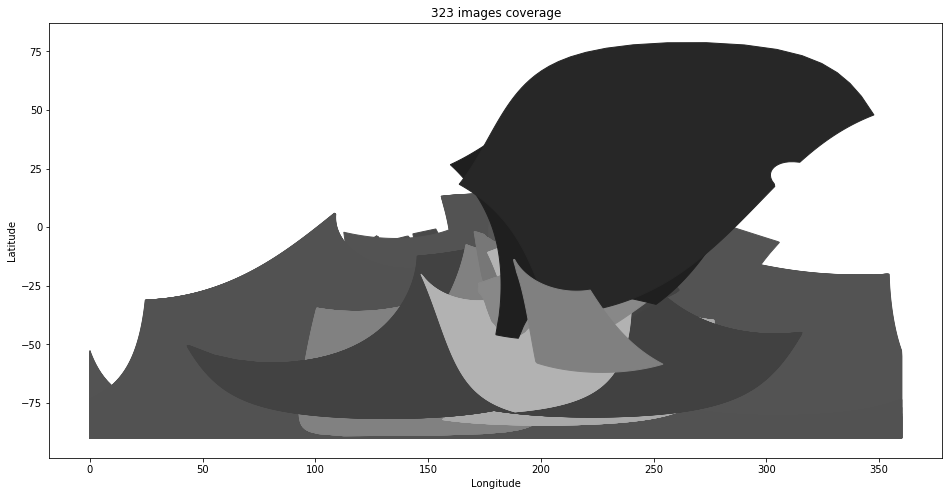

In [89]:

plot_phaserangemap(ks, title = '{} images coverage'.format(len(ks)), 
              roi=None, annotate=False, display=True,
             roiname = 'ks', savefile = pngname, color =None)


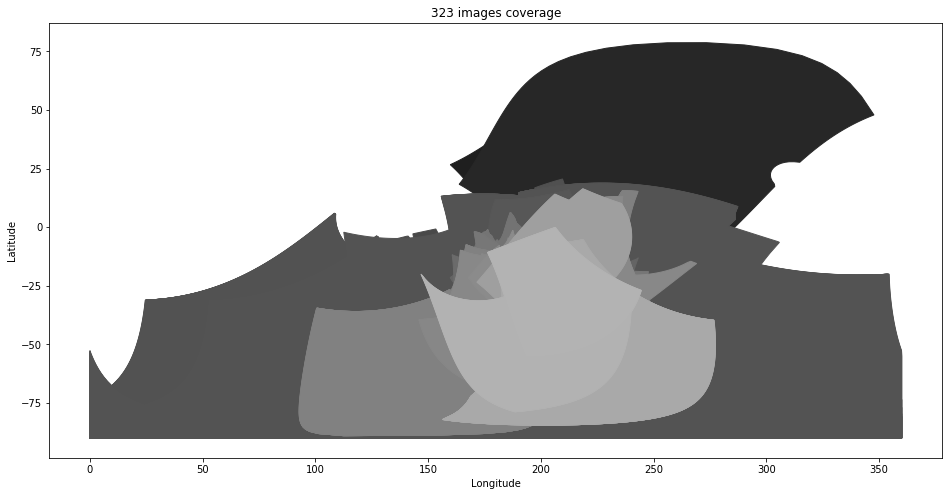

In [90]:
ks1 = ks.sort_values('PhaseAverage').copy()

plot_phaserangemap(ks1, title = '{} images coverage'.format(len(ks)), 
              roi=None, annotate=False, display=True,
             roiname = 'ks', savefile = pngname, color =None)

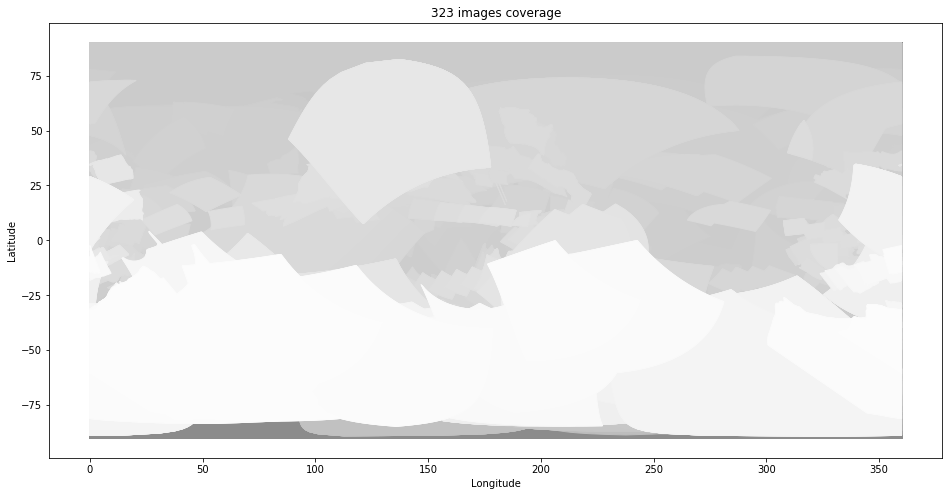

In [95]:


highres1 = highres.sort_values('PhaseAverage').copy()

plot_phaserangemap(highres1, title = '{} images coverage'.format(len(ks)), 
              roi=None, annotate=False, display=True,
             roiname = 'ks', savefile = pngname, color =None)

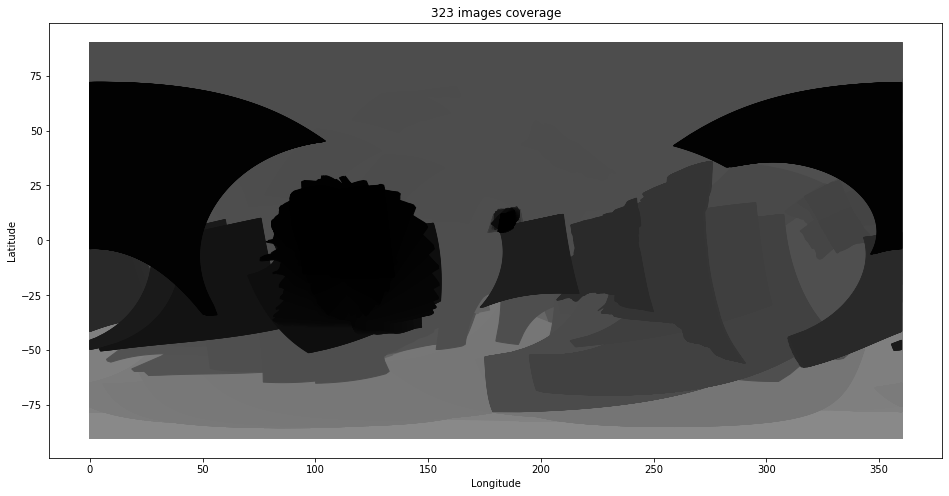

In [98]:
highres1 = highres.sort_values('PhaseAverage',ascending=0).copy()

plot_phaserangemap(highres1, title = '{} images coverage'.format(len(ks)), 
              roi=None, annotate=False, display=True,
             roiname = 'ks', savefile = pngname, color =None)